## 특징 선택
- 클래스 관련성 척도는 특징과 라벨의 유형에 따라 선택함
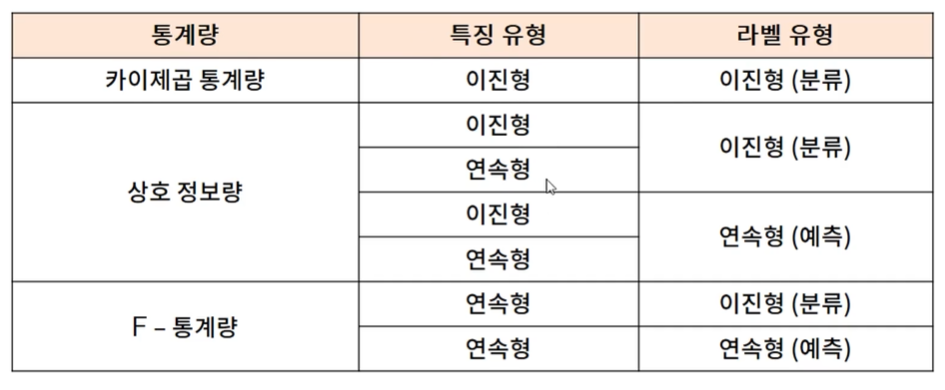

### pandas.get_dummies
  - DataFrame이나 Series에 포함된 범주 변수를 더미화 하는 함수
  - 주요입력
    - data : 더미화를 수행할 DataFrame 혹은 Series
    - drop_first : 첫 번쨰 더미 변수를 제거할지 여부(특별한 경우를 제외하면 True라고 설정)
- 사용시 주의사항 : 숫자로 표현된 범주 변수 (예: 시간대, 월, 숫자로 코드화된 각종 문자)를 더미화하려면, 반드시 astype(str)을 이용하여 컬럼의 타입을 str타입으로 변경해야함

## 계층적 군집화 기본개념
- 개별 샘플을 군집으로 간주하여, 거리가 가장 가까운 두 군집을 순차적으로 묶는 방식으로 큰 군집을 생성

## 최단 연결법
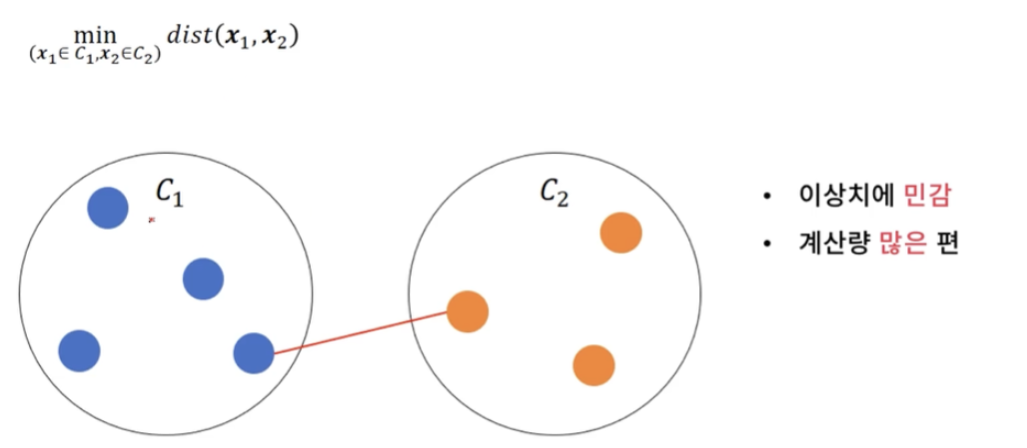

## 최장 연결법
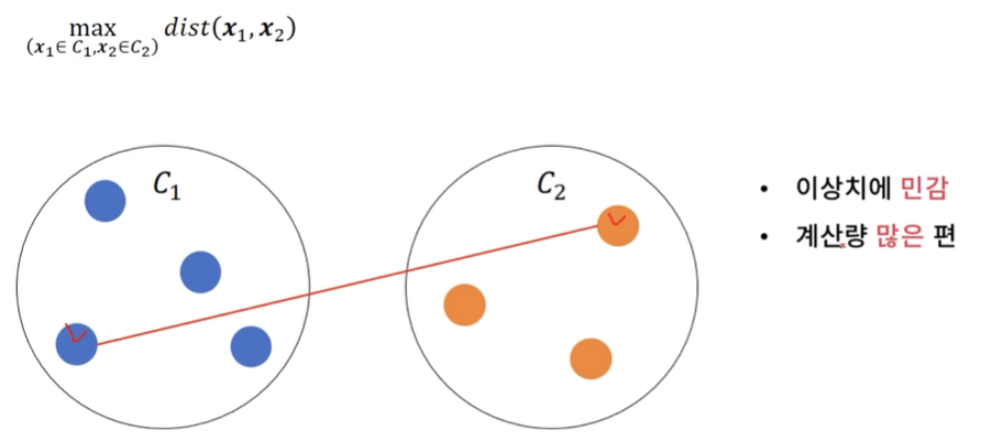

## 평균 연결법
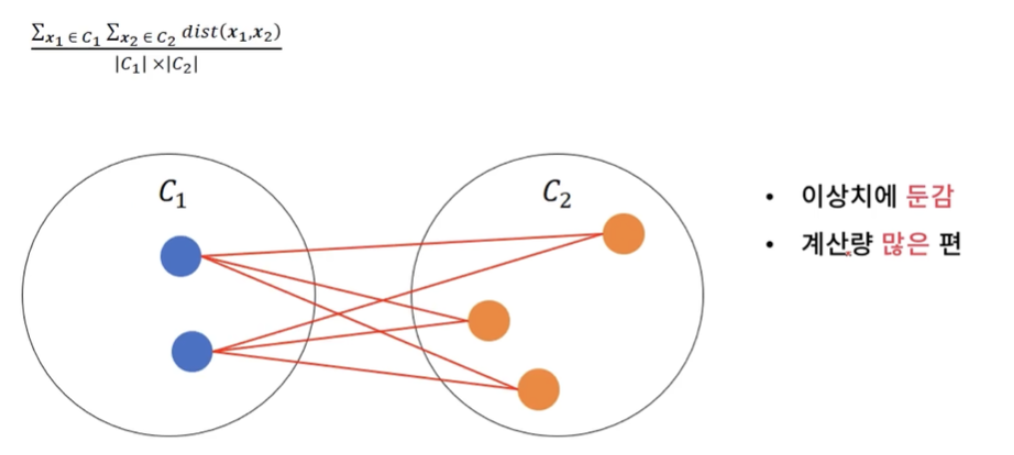

## 중심 연결법
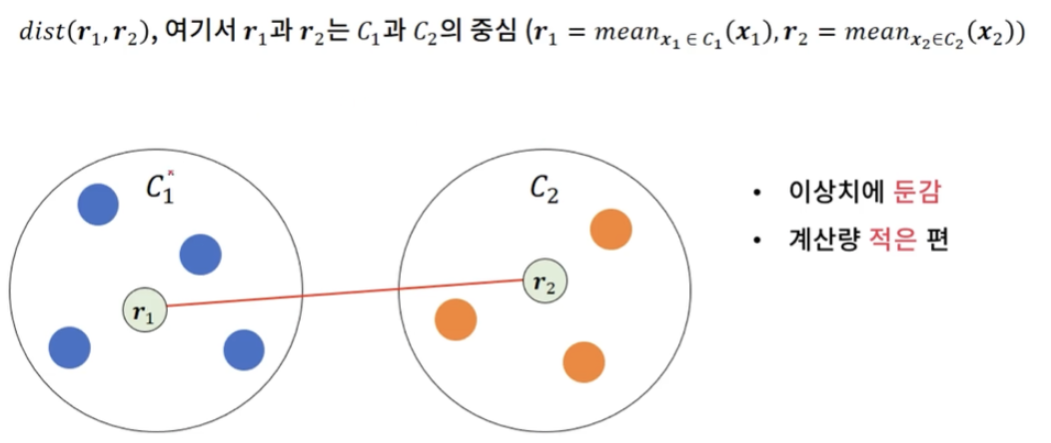

## 와드 연결법
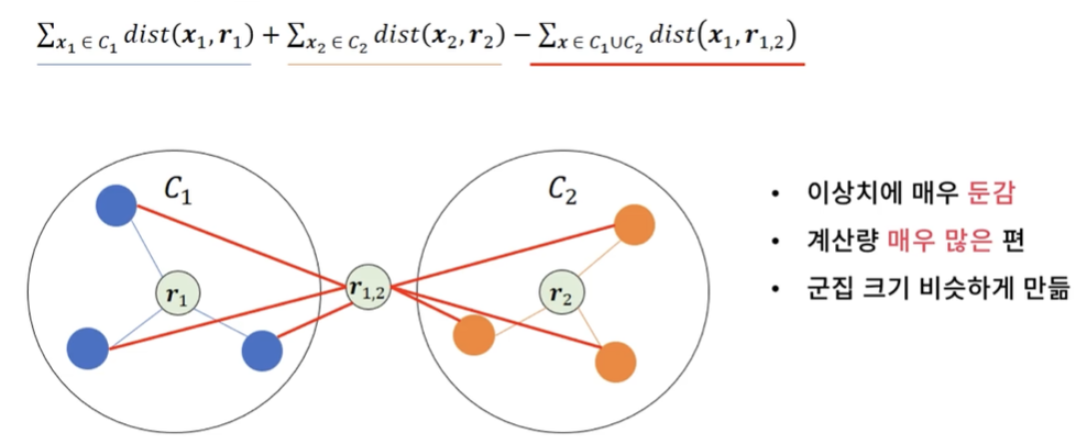

### sklearn.cluster.AgglomerativeClustering
- 주요입력
  - n_clusters:군집개수
  - affinity : 거리 척도{"Euclidean", "manhattan", "cosine", "precomputed"
    - linkage가 ward로 입력되면 "Euclidean"만 사용 가능함
    - "precomputed"는 거리 혹은 유사도 행렬을 입력으로 하는 경우에 설정하는 값
  - linkage : 군집 간 러ㅣ {"ward", "complete", "average", "single"}
    - complete: 최장 연결법
    - average : 평균 연결법
    - single : 최단 연결법
- 주요 method
  - fit(x) : 데이터 x에 대한 군집화 모델 학습
  - fit_predict(x) : 데이터 x에 대한 군집화 모델 학습 및 라벨 반환
- 주요 속성
  - labels_: fitting한 데이터에 있는 샘플들이 속한 군집 정보 (ndarray)

In [1]:
import os
import pandas as pd
os.chdir(r'C:\Users\신상훈\Desktop\preprocessing\part-2.-탐색적-데이터-분석\2. 탐색적 데이터 분석\데이터')

## 고객 특성에 따른 군집화

In [3]:
df = pd.read_csv('Telco_customer_info.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [4]:
df.set_index('customerID', inplace = True)

In [5]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
customerID,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [6]:
df = pd.get_dummies(df, drop_first = True)
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,1,29.85,29.85,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
5575-GNVDE,0,34,56.95,1889.50,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
3668-QPYBK,0,2,53.85,108.15,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
7795-CFOCW,0,45,42.30,1840.75,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
9237-HQITU,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0


In [7]:
df.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [8]:
from sklearn.cluster import AgglomerativeClustering
clusters = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward').fit(df)

In [9]:
df['군집정보'] = clusters.labels_
df['군집정보'].head()

customerID
7590-VHVEG    2
5575-GNVDE    1
3668-QPYBK    2
7795-CFOCW    1
9237-HQITU    2
Name: 군집정보, dtype: int64

In [10]:
df.groupby(['군집정보'])[['MonthlyCharges', 'TotalCharges']].mean()

,MonthlyCharges,TotalCharges
군집정보,,
0,92.846384,5615.733243
1,65.558747,2192.519269
2,48.428814,444.712194


In [11]:
df.groupby(['군집정보'])[['SeniorCitizen', 'StreamingTV_Yes']].mean()

,SeniorCitizen,StreamingTV_Yes
군집정보,,
0,0.213708,0.744738
1,0.181723,0.390078
2,0.121936,0.176471


### 구매기록 기준 고객 군집화

In [12]:
df = pd.read_csv('베스트셀러_도서구매기록.txt', sep = '\t', engine = 'python')

In [13]:
df.head()

,회원번호,책제목
0,75111,정글만리 1
1,48022,정글만리 1
2,3063,해커스 토익 Reading
3,84128,뱃살부터 빼셔야겠습니다
4,77611,장하준의 경제학 강의


In [14]:
matrix_df = pd.crosstab(index = df['회원번호'], columns = df['책제목'])
matrix_df.head()

책제목,1cm+,21세기 자본,EBS FM 라디오 고교 영어듣기 (2014년),EBS N제 국어영역 국어 270제 A형 (2014년),EBS N제 국어영역 국어 270제 B형 (2014년),EBS N제 영어영역 영어 280제 (2014년),EBS 수능완성 국어영역 국어 A형 유형편+실전편 (2014년),EBS 수능완성 국어영역 국어 B형 유형편+실전편 (2014년),EBS 수능완성 수학영역 기하와 벡터 (2014년),EBS 수능완성 수학영역 미적분과 통계 기본 유형편+실전편 A형 (2014년),...,정글만리 3,제3인류 3,창문 넘어 도망친 100세 노인,책은 도끼다,"총, 균, 쇠",칼 비테의 자녀교육 불변의 법칙,코스모스,해커스 토익 Listening,해커스 토익 Reading,해커스 토익 보카 Vocabulary
회원번호,,,,,,,,,,,,,,,,,,,,,
808,0,0,1,0,1,1,0,3,0,1,...,0,0,1,0,0,0,0,0,0,0
1101,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1479,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1805,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2011,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# 군집화 모델 인스턴스화 및 학습
from sklearn.cluster import AgglomerativeClustering as AC
clustering_model = AC(n_clusters = 10,
                      affinity = "jaccard",
                      linkage = "average")
clustering_model.fit(matrix_df)

AgglomerativeClustering(affinity='jaccard', linkage='average', n_clusters=10)

In [16]:
cluster_labels = clustering_model.labels_
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [17]:
# 회원별 소속 군집 확인
cluster_info = pd.DataFrame({"회원ID":matrix_df.index, "소속군집":cluster_labels})
cluster_info.head()

,회원ID,소속군집
0,808,0
1,1101,0
2,1479,0
3,1805,0
4,2011,0


In [18]:
cluster_info['소속군집'].value_counts() # 대다수가 0번 군집에 속함

0    665
1     12
2      6
3      4
8      2
4      2
9      1
7      1
6      1
5      1
Name: 소속군집, dtype: int64

In [22]:
matrix_df_with_cluster_info = pd.merge(matrix_df, cluster_info, left_index = True, right_on = '회원ID')
matrix_df_with_cluster_info

,1cm+,21세기 자본,EBS FM 라디오 고교 영어듣기 (2014년),EBS N제 국어영역 국어 270제 A형 (2014년),EBS N제 국어영역 국어 270제 B형 (2014년),EBS N제 영어영역 영어 280제 (2014년),EBS 수능완성 국어영역 국어 A형 유형편+실전편 (2014년),EBS 수능완성 국어영역 국어 B형 유형편+실전편 (2014년),EBS 수능완성 수학영역 기하와 벡터 (2014년),EBS 수능완성 수학영역 미적분과 통계 기본 유형편+실전편 A형 (2014년),...,창문 넘어 도망친 100세 노인,책은 도끼다,"총, 균, 쇠",칼 비테의 자녀교육 불변의 법칙,코스모스,해커스 토익 Listening,해커스 토익 Reading,해커스 토익 보카 Vocabulary,회원ID,소속군집
0,0,0,1,0,1,1,0,3,0,1,...,1,0,0,0,0,0,0,0,808,0
1,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1101,0
2,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1479,0
3,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1805,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2011,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
690,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,99516,0
691,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,99576,0
692,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,99588,0
693,0,0,0,1,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,99829,0


In [20]:
matrix_df_with_cluster_info.groupby(['소속군집'])[matrix_df.columns].mean()

,1cm+,21세기 자본,EBS FM 라디오 고교 영어듣기 (2014년),EBS N제 국어영역 국어 270제 A형 (2014년),EBS N제 국어영역 국어 270제 B형 (2014년),EBS N제 영어영역 영어 280제 (2014년),EBS 수능완성 국어영역 국어 A형 유형편+실전편 (2014년),EBS 수능완성 국어영역 국어 B형 유형편+실전편 (2014년),EBS 수능완성 수학영역 기하와 벡터 (2014년),EBS 수능완성 수학영역 미적분과 통계 기본 유형편+실전편 A형 (2014년),...,정글만리 3,제3인류 3,창문 넘어 도망친 100세 노인,책은 도끼다,"총, 균, 쇠",칼 비테의 자녀교육 불변의 법칙,코스모스,해커스 토익 Listening,해커스 토익 Reading,해커스 토익 보카 Vocabulary
소속군집,,,,,,,,,,,,,,,,,,,,,
0,0.063158,0.039098,0.440602,0.264662,0.354887,0.619549,0.312782,0.372932,0.288722,0.324812,...,0.099248,0.033083,0.156391,0.042105,0.097744,0.034586,0.010526,0.03609,0.039098,0.04812
1,0.500000,0.500000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.333333,1.166667,0.500000,0.000000,0.000000,0.000000,0.00000,0.000000,0.25000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.500000,0.000000,0.00000,0.000000,0.00000
3,0.000000,0.000000,0.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000
4,0.000000,0.000000,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000


In [21]:
# 군집별로 가장 많이 구매하는 책 목록 확인
matrix_df_with_cluster_info.groupby(['소속군집'])[matrix_df.columns].mean().idxmax(axis = 1)

소속군집
0    EBS 수능특강 영어영역 영어 (2014년)
1           창문 넘어 도망친 100세 노인
2                 나미야 잡화점의 기적
3              어떻게 원하는 것을 얻는가
4    EBS 수능특강 영어영역 영어 (2014년)
5                   강신주의 감정수업
6                    마법천자문 27
7                 꾸뻬 씨의 행복 여행
8              나는 까칠하게 살기로 했다
9                    월급쟁이 부자들
dtype: object